MODEL KNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Tambahan untuk visualisasi yang lebih bagus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

1. EXPLORATORY DATA & PRE-PROCESSING

In [ ]:
df = pd.read_csv('/content/sample_data/Heart_Disease_Prediction.csv')

print("--- Info Dataset ---")
print(df.info())  # Cek tipe data dan apakah ada nilai null
print("\n--- 5 Baris Teratas ---")
print(df.head())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: fl

Pre-processing

In [ ]:
X = df.iloc[:, :-1] # Semua kolom kecuali yang terakhir
y = df.iloc[:, -1]  # Hanya kolom terakhir

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

2. VISUALISASI DENGAN MATPLOTLIB

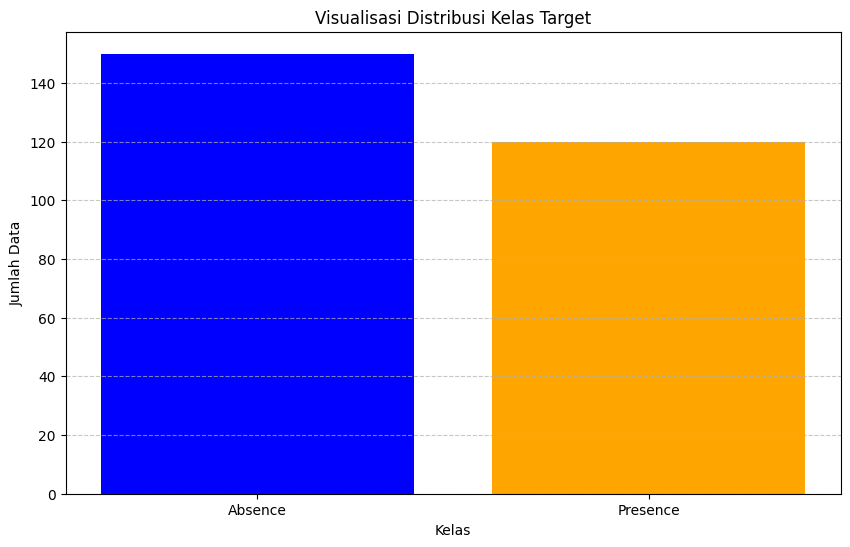

In [ ]:
plt.figure(figsize=(10, 6))

kelas_counts = y.value_counts()
plt.bar(kelas_counts.index, kelas_counts.values, color=['blue', 'orange'])
plt.title('Visualisasi Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.xticks(kelas_counts.index) # Agar label sumbu X jelas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. PEMODELAN (SUPERVISED LEARNING)

In [ ]:
print("\n--- Memulai Training Model K-NN ---")
model = KNeighborsClassifier(n_neighbors=5) # K-NN dengan k=5
model.fit(X_train, y_train)


--- Memulai Training Model K-NN ---


KNeighborsClassifier()

4. EVALUASI MODEL

In [ ]:
y_pred = model.predict(X_test)

print("\n--- Hasil Evaluasi ---")
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Hasil Evaluasi ---
Akurasi Model: 0.8148148148148148

Confusion Matrix:
 [[30  3]
 [ 7 14]]

Classification Report:
               precision    recall  f1-score   support

     Absence       0.81      0.91      0.86        33
    Presence       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54

